<a href="https://colab.research.google.com/github/RoseJared/AI-ML/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Visualization Libraries

In this section, we are importing two popular Python libraries used for creating visualizations:

- **`matplotlib.pyplot`**: This is a core plotting library that allows us to create charts like line graphs, bar charts, and scatter plots. We import it as `plt` to make it easier to use in our code.
- **`seaborn`**: This is a library built on top of `matplotlib` that makes it easier to create more visually appealing and informative charts, especially when working with data in tables (like pandas DataFrames).

We'll use these tools later to explore the data and better understand the relationships between different features (columns) in our dataset.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import numpy as np
import xgboost as xgb
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from scipy.stats import uniform, randint
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
import matplotlib.pyplot as plt

### Loading the Datasets

In this section, we are using the **`pandas`** library (imported as `pd`) to load two datasets from Google Drive:

- **`beijing_df`**: This dataset contains air quality data specifically for Beijing. It likely includes information such as pollutant levels, weather conditions, and timestamps.
- **`worldcities_df`**: This dataset contains information about cities around the world, such as their names, countries, and geographic coordinates (latitude and longitude).

To load these files:
1. We start with a shared Google Drive URL for each file.
2. We modify the URL so that it can be accessed directly by Python using `pandas.read_csv()`, which reads the data into a structured table called a **DataFrame**.

DataFrames are useful because they allow us to easily view, analyze, and manipulate large tables of data using Python.


In [ ]:
import pandas as pd
url= 'https://drive.google.com/file/d/1BFefZwgVG5eBv0f4ocR2tfWKINJ7XzWb/view?usp=sharing'
url= 'https://drive.google.com/uc?id=' + url.split('/')[-2]
beijing_df= pd.read_csv(url)


### Displaying the Beijing Dataset

This line displays the contents of the `beijing_df` DataFrame. When run in a Jupyter Notebook, it will show the first few rows of the air quality dataset for Beijing.

This is useful for getting an initial look at the data, including the columns available, the types of values stored, and whether there are any obvious issues (like missing or strange values) we might need to clean.


In [ ]:
# = pd.read_csv(file_path)
beijing_df

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


### Checking for Missing Values

In this step, we are checking for any missing (null) values in the `beijing_df` dataset.

- `beijing_df.isnull()` creates a table of the same shape as the original, where each cell is marked `True` if it is missing and `False` if it is not.
- `.sum()` then adds up the number of `True` values in each column, giving us the total count of missing values per column.

This is an important part of data cleaning. Identifying missing data early helps to decide how to handle it later, either by removing incomplete rows, filling in the gaps, or applying other techniques to ensure the analysis remains accurate.


In [ ]:
# Check for missing values in each column
missing_values = beijing_df.isnull().sum()

### Exploring Dataset Structure and Missing Data

This section provides a deeper look into the structure of the dataset and checks for any missing data:

1. **Missing Values Summary**:
   - Prints a list showing how many missing values exist in each column.
   - This helps identify which columns might need cleaning or special handling.

2. **List of Features**:
   - Displays the names of all columns (also called features) in the dataset.
   - Knowing the feature names gives us a better understanding of what kind of data we're working with.

3. **Dataset Info Overview**:
   - `beijing_df.info()` shows details about the dataset, including:
     - The total number of entries (rows),
     - The number of non-null (non-missing) values in each column,
     - The data type of each column (e.g., integer, float, object for text).

This information is critical before performing any machine learning analysis, as it helps identify data types, missing values, and whether preprocessing is required.



In [ ]:
# Print the count of missing values by column
print("Missing values by column:")
print(missing_values)

Missing values by column:
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64


In [ ]:
# Print all column names (features) in the dataset
print("All features in the dataset:")
print(beijing_df.columns.tolist())

All features in the dataset:
['year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']


In [ ]:
# Print information about each feature including data types and non-null counts
print("\nDataset information:")
print(beijing_df.info())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   year     420768 non-null  int64  
 1   month    420768 non-null  int64  
 2   day      420768 non-null  int64  
 3   hour     420768 non-null  int64  
 4   PM2.5    412029 non-null  float64
 5   PM10     414319 non-null  float64
 6   SO2      411747 non-null  float64
 7   NO2      408652 non-null  float64
 8   CO       400067 non-null  float64
 9   O3       407491 non-null  float64
 10  TEMP     420370 non-null  float64
 11  PRES     420375 non-null  float64
 12  DEWP     420365 non-null  float64
 13  RAIN     420378 non-null  float64
 14  wd       418946 non-null  object 
 15  WSPM     420450 non-null  float64
 16  station  420768 non-null  object 
dtypes: float64(11), int64(4), object(2)
memory usage: 54.6+ MB
None


### Handling Missing Data

In this step, we clean the dataset by filling in missing values:

1. **Filling Missing Values in Numerical Columns**:
   - For each numerical feature (like `PM2.5`, `TEMP`, `RAIN`, etc.), we replace missing values with the **median** of that column.
   - The median is used because it's less affected by extreme values (outliers) than the average, making it a reliable choice for filling in missing data.

2. **Filling Missing Values in Categorical Column**:
   - For the `wd` column (which stands for wind direction and contains text values), we fill in missing entries using the **most frequent value** (also known as the mode).

3. **Verifying the Fixes**:
   - After filling in the missing values, we check again to confirm that there are no missing values left in the dataset.

Cleaning missing data is an essential step before building any machine learning model, as many algorithms cannot handle empty or incomplete values.

In [ ]:
# Fill numerical columns with their medians
numerical_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
for col in numerical_cols:
    beijing_df[col] = beijing_df[col].fillna(beijing_df[col].median())

In [ ]:
# Fill wind direction (categorical) with most common value
beijing_df['wd'] = beijing_df['wd'].fillna(beijing_df['wd'].mode()[0])

In [ ]:
# Verify the changes
print("\nMissing values after cleaning:")
print(beijing_df.isnull().sum())


Missing values after cleaning:
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


### Previewing the Cleaned Dataset

This section gives us a final look at the cleaned dataset to make sure everything is in good shape before we move on to analysis or modeling:

1. **Dataset Shape**:
   - `beijing_df.shape` tells us how many rows and columns are in the dataset after cleaning.
   - This helps verify that no unexpected rows or columns were removed during the cleaning process.

2. **First Few Rows**:
   - `beijing_df.head()` displays the first 5 rows of the dataset.
   - This preview gives us a quick sense of the structure and content of the data, including whether the missing values have been properly handled.

This step acts as a quick visual check to confirm that our data is now complete and ready for further analysis.

In [ ]:
# Display information about the cleaned dataset
print("Dataset shape (rows, columns):", beijing_df.shape)

Dataset shape (rows, columns): (420768, 17)


In [ ]:
# Display the first 5 rows of the cleaned dataset
print("\nFirst 5 rows of the cleaned dataset:")
print(beijing_df.head())


First 5 rows of the cleaned dataset:
   year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP    PRES  \
0  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7  1023.0   
1  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1  1023.2   
2  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1  1023.5   
3  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4  1024.5   
4  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0  1025.2   

   DEWP  RAIN   wd  WSPM       station  
0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1 -18.2   0.0    N   4.7  Aotizhongxin  
2 -18.2   0.0  NNW   5.6  Aotizhongxin  
3 -19.4   0.0   NW   3.1  Aotizhongxin  
4 -19.5   0.0    N   2.0  Aotizhongxin  


### Summarizing and Validating the Data

In this section, we take a closer look at the dataset to better understand the range and distribution of values, as well as to confirm that everything is formatted correctly:

1. **Summary Statistics**:
   - beijing_df.describe() provides key statistics for each numerical column, including the mean, median, minimum, maximum, and standard deviation.
   - This helps us understand the typical values and variability in the data, which is useful for both exploration and identifying any unusual values (outliers).

2. **Random Sample Preview**:
   - We display a small sample of 10 rows from the dataset. This gives a quick look at various parts of the data to see if everything looks consistent and reasonable.

3. **Data Type Validation**:
   - beijing_df.dtypes lists the data type for each column (e.g., integer, float, or object for text).
   - It's important to make sure each feature has the correct type before performing analysis or feeding the data into a machine learning model.

Together, these steps help ensure the dataset is well-understood and ready for visualization or modeling.


In [ ]:
# Display summary statistics for numerical columns
print("\nSummary statistics:")
print(beijing_df.describe())


Summary statistics:
                year          month            day           hour  \
count  420768.000000  420768.000000  420768.000000  420768.000000   
mean     2014.662560       6.522930      15.729637      11.500000   
std         1.177198       3.448707       8.800102       6.922195   
min      2013.000000       1.000000       1.000000       0.000000   
25%      2014.000000       4.000000       8.000000       5.750000   
50%      2015.000000       7.000000      16.000000      11.500000   
75%      2016.000000      10.000000      23.000000      17.250000   
max      2017.000000      12.000000      31.000000      23.000000   

               PM2.5           PM10            SO2            NO2  \
count  420768.000000  420768.000000  420768.000000  420768.000000   
mean       79.278489     104.256193      15.641507      50.418633   
std        80.056799      91.108745      21.455419      34.642023   
min         2.000000       2.000000       0.285600       1.026500   
25%        2

In [ ]:
# Display a random sample of 10 rows from different parts of the dataset
print("\nRandom sample of 10 rows:")
print(beijing_df.head())


Random sample of 10 rows:
   year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP    PRES  \
0  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7  1023.0   
1  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1  1023.2   
2  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1  1023.5   
3  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4  1024.5   
4  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0  1025.2   

   DEWP  RAIN   wd  WSPM       station  
0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1 -18.2   0.0    N   4.7  Aotizhongxin  
2 -18.2   0.0  NNW   5.6  Aotizhongxin  
3 -19.4   0.0   NW   3.1  Aotizhongxin  
4 -19.5   0.0    N   2.0  Aotizhongxin  


In [ ]:
print(beijing_df[['CO']].head())

      CO
0  300.0
1  300.0
2  300.0
3  300.0
4  300.0


In [ ]:
# Validate data integrity
print("\nData types:")
print(beijing_df.dtypes)


Data types:
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object


### Correlation Heatmap

This section shows how different numerical features in the dataset relate to each other:

1. **Correlation Matrix**:
   - Measures how strongly pairs of features are related, with values from `-1` (negative correlation) to `1` (positive correlation).

2. **Heatmap Visualization**:
   - The heatmap uses colors and numbers to display the strength of these relationships.
   - Red tones indicate positive correlations, blue tones indicate negative ones.

This helps us quickly spot features that are closely related, which can guide feature selection for machine learning models.


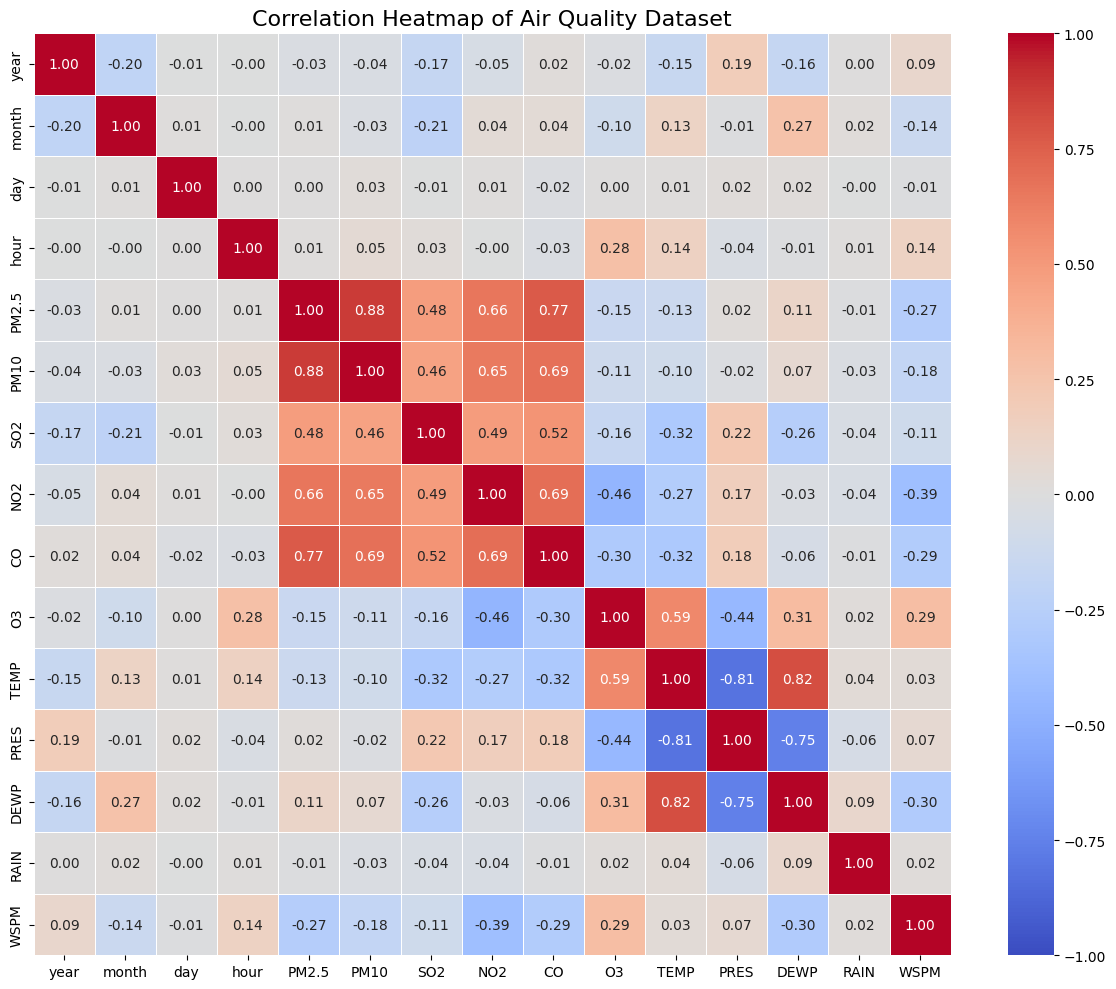

In [ ]:
# Calculate correlation matrix
correlation_matrix = beijing_df.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(12, 10))

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Air Quality Dataset', fontsize=16)
plt.tight_layout()
plt.show()

### Calculating the Air Quality Index (AQI)

In this section, we compute the Air Quality Index (AQI) for each row in the dataset based on standard pollutant concentration levels:

1. **Unit Conversion**:
   - The `CO` and `O3` columns are converted from micrograms per cubic meter (μg/m³) to more standard units: parts per million (ppm) for CO and parts per billion (ppb) for O3.

2. **AQI Breakpoints**:
   - Each pollutant has defined concentration ranges (called breakpoints) that map to corresponding AQI values. These are based on official environmental health standards.

3. **AQI Calculation**:
   - For each row of data, we calculate the AQI for all six pollutants and keep the highest one. This represents the overall AQI for that time and location.

4. **AQI Category Labeling**:
   - The final AQI value is mapped to a category like "Good", "Moderate", or "Unhealthy", which helps communicate the quality of the air in a way that’s easier to understand.

5. **Result Preview**:
   - A few key columns (station, date/time, AQI, and category) are shown to confirm the AQI calculation worked correctly.

This process transforms raw pollutant measurements into a single, easy-to-understand indicator of air quality.


In [ ]:
# Correcting CO and O3 to appropriate units
#beijing_df['CO'] = beijing_df['CO'] / 1000  # Convert from μg/m³ to ppm
#beijing_df['O3'] = beijing_df['O3'] / 1000  # Convert from μg/m³ to ppb
#internet https://www.freeonlinecalc.com/air-quality-index-aqi-calculation-review-and-formulas.html

# Convert CO from µg/m³ to ppm
beijing_df['CO'] = beijing_df['CO'] * (24.45 / 28010)

# Convert O3 from µg/m³ to ppb
beijing_df['O3'] = (beijing_df['O3'] * 24.45 / (48 * 1000)) * 1000
# Define AQI breakpoints for each pollutant
aqi_breakpoints = {
    'PM2.5': [(0, 12), (12.1, 35.4), (35.5, 55.4), (55.5, 150.4), (150.5, 250.4), (250.5, 500.4)],
    'PM10': [(0, 54), (55, 154), (155, 254), (255, 354), (355, 424), (425, 604)],
    'SO2': [(0, 35), (36, 75), (76, 185), (186, 304), (305, 604), (605, 1004)],
    'NO2': [(0, 53), (54, 100), (101, 360), (361, 649), (650, 1249), (1250, 2049)],
    'CO': [(0.0, 4.4), (4.5, 9.4), (9.5, 12.4), (12.5, 15.4), (15.5, 30.4), (30.5, 50.4)],
    'O3': [(0, 54), (55, 70), (71, 85), (86, 105), (106, 200), (201, 404)]
}

# Corresponding AQI index ranges
aqi_indices = [(0, 50), (51, 100), (101, 150), (151, 200), (201, 300), (301, 500)]

# Function to calculate individual AQI for a pollutant
def calculate_individual_aqi(concentration, breakpoints, aqi_range):
    for i in range(len(breakpoints)):
        low_bp, high_bp = breakpoints[i]
        low_idx, high_idx = aqi_range[i]
        if low_bp <= concentration <= high_bp:
            aqi = ((high_idx - low_idx) / (high_bp - low_bp)) * (concentration - low_bp) + low_idx
            return round(aqi)
    return 500  # Return 500 if beyond highest range

# Function to calculate AQI for each row
def calculate_aqi(row):
    aqi_list = []
    for pollutant in aqi_breakpoints.keys():
        concentration = row[pollutant]
        breakpoints = aqi_breakpoints[pollutant]
        aqi_list.append(calculate_individual_aqi(concentration, breakpoints, aqi_indices))
    return max(aqi_list)

# Apply AQI calculation to each row
beijing_df['AQI'] = beijing_df.apply(calculate_aqi, axis=1)

# Map AQI to AQI Category
def categorize_aqi(aqi):
    if aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Moderate'
    elif aqi <= 150:
        return 'Unhealthy for Sensitive Groups'
    elif aqi <= 200:
        return 'Unhealthy'
    elif aqi <= 300:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

beijing_df['AQI_Category'] = beijing_df['AQI'].apply(categorize_aqi)

# Preview the resulting DataFrame
print(beijing_df[['station', 'year', 'month', 'day', 'hour',
                  'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3',
                  'AQI', 'AQI_Category']])

              station  year  month  day  hour  PM2.5  PM10   SO2   NO2  \
0        Aotizhongxin  2013      3    1     0    4.0   4.0   4.0   7.0   
1        Aotizhongxin  2013      3    1     1    8.0   8.0   4.0   7.0   
2        Aotizhongxin  2013      3    1     2    7.0   7.0   5.0  10.0   
3        Aotizhongxin  2013      3    1     3    6.0   6.0  11.0  11.0   
4        Aotizhongxin  2013      3    1     4    3.0   3.0  12.0  12.0   
...               ...   ...    ...  ...   ...    ...   ...   ...   ...   
420763  Wanshouxigong  2017      2   28    19   11.0  32.0   3.0  24.0   
420764  Wanshouxigong  2017      2   28    20   13.0  32.0   3.0  41.0   
420765  Wanshouxigong  2017      2   28    21   14.0  28.0   4.0  38.0   
420766  Wanshouxigong  2017      2   28    22   12.0  23.0   4.0  30.0   
420767  Wanshouxigong  2017      2   28    23   13.0  19.0   4.0  38.0   

              CO         O3  AQI AQI_Category  
0       0.261871  39.221875   36         Good  
1       0.26187

# Test with knowledge



In [ ]:
test_data = {
    'PM2.5': 5.0,  # Expected AQI = Good
    'PM10': 50.0,  # Expected AQI = Good
    'SO2': 30.0,   # Expected AQI = Good
    'NO2': 50.0,   # Expected AQI = Good
    'CO': 1.0,     # Expected AQI = Good
    'O3': 30.0     # Expected AQI = Good
}

test_df = pd.DataFrame([test_data])
test_df['AQI'] = test_df.apply(calculate_aqi, axis=1)
test_df['AQI_Category'] = test_df['AQI'].apply(categorize_aqi)

print(test_df)

   PM2.5  PM10   SO2   NO2   CO    O3  AQI AQI_Category
0    5.0  50.0  30.0  50.0  1.0  30.0   47         Good


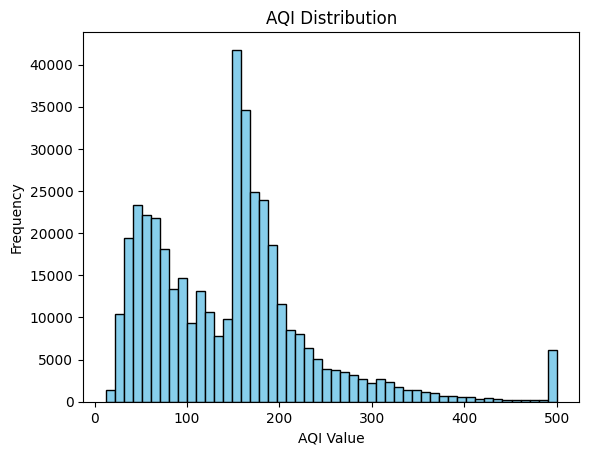

In [ ]:
plt.hist(beijing_df['AQI'], bins=50, color='skyblue', edgecolor='black')
plt.title('AQI Distribution')
plt.xlabel('AQI Value')
plt.ylabel('Frequency')
plt.show()

#Linear Regression for AQI Prediction

### Preparing Data for AQI Prediction Using Linear Regression

This section sets up the data for building a machine learning model that can predict AQI based on environmental measurements:

1. **Library Imports**:
   - We import tools from the `scikit-learn` library for splitting data, building a linear regression model, evaluating performance, and scaling features.

2. **Feature Selection**:
   - We choose a set of predictor variables (features) that likely affect air quality, such as pollutant levels (`PM2.5`, `CO`, etc.) and weather data (`TEMP`, `PRES`).
   - The variable we want to predict is `AQI`, which serves as our **target**.

3. **Preparing Input and Output**:
   - `X` holds the features (input data), and `y` holds the target (AQI values).

4. **Train-Test Split**:
   - The data is split into two parts, standard ratio used:
     - **Training set** (80%): Used to train the model.
     - **Testing set** (20%): Used to evaluate how well the model performs on new, unseen data.

Splitting the data this way helps ensure that the model can generalize well and is not just memorizing the training data.


In [ ]:
# Assuming 'beijing_df' is your DataFrame
# Select relevant features for AQI prediction
features = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
#'TEMP', 'PRES'
target = 'AQI'

# Prepare the features and target
X = beijing_df[features]
y = beijing_df[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Standardizing Features

We scale the input features so they all have the same range:

- Features like temperature and pollutants vary widely in scale, which can affect model performance.
- StandardScaler adjusts each feature to have a mean of 0 and standard deviation of 1.

This helps the model train more efficiently and can improve accuracy.


In [ ]:
# Standardize the features (optional but often helps with performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear Regression Model

We train a Linear Regression model to predict AQI:

- The model is fit on the training data and used to predict AQI for the test set.
- We evaluate it using:
  - **MSE (Mean Squared Error)**: Lower is better.
  - **R² Score**: Closer to 1 means better fit.

These metrics show how well the model performs.


In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_linear = linear_model.predict(X_test_scaled)

# Evaluate the Linear Regression model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression - MSE: {mse_linear}, R²: {r2_linear}")

Linear Regression - MSE: 1811.4221148264621, R²: 0.7704252870468431


### Visualizing Linear Regression Predictions

This plot compares the actual AQI values to the values predicted by the linear regression model.

- Each point represents a prediction.
- The dashed red line shows perfect predictions (where predicted = actual).
- Points closer to the line indicate better model performance.


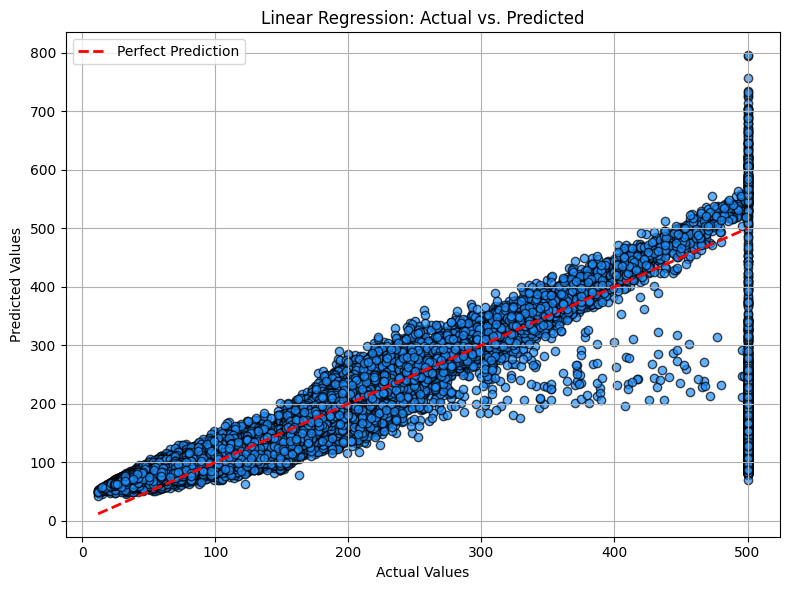

In [ ]:
# Scatter plot of actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear, color='dodgerblue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs. Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Linear Regression Results Summary

The Linear Regression model was trained to predict AQI using features such as pollutant levels and weather conditions. After testing on unseen data, the model produced the following results:

- **Mean Squared Error (MSE)**: 1811.42  
- **R² Score**: 0.77

**Interpretation**:
- The low MSE indicates that the predicted AQI values are, on average, not far from the actual values.
- An R² score of 0.77 means that 77% of the variation in AQI can be explained by the features used in the model.

These results suggest that the linear model is performing well and is effective for this prediction task.


#improved

In [ ]:
if 'beijing_df' not in locals() or not isinstance(beijing_df, pd.DataFrame):
    print("Error: DataFrame 'beijing_df' not found. Please load your data first.")
else:
    # --- Define Features and Target ---
    # Choose one of the following feature lists or define your own:
    features = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3'] # Original features
    # features = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES'] # Features including TEMP/PRES
    target = 'AQI'
    try:
        X = beijing_df[features]
        y = beijing_df[target]

        # --- Split Data ---
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # --- Build Pipeline for Interaction Features ---
        # Step 1: Define PolynomialFeatures for interactions only
        poly_interactions = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

        # Step 2: Define the full pipeline
        pipeline_interactions = Pipeline([
            ('poly', poly_interactions), # Generate interaction features (e.g., PM2.5 * PM10)
            ('scale', StandardScaler()), # Scale the features (including interactions)
            ('lin_reg', LinearRegression()) # Linear Regression model
        ])

        # --- Train the Model ---
        pipeline_interactions.fit(X_train, y_train)

        # --- Predict on Test Set ---
        y_pred_interactions = pipeline_interactions.predict(X_test)

        # --- Evaluate the Model ---
        mse_interactions = mean_squared_error(y_test, y_pred_interactions)
        r2_interactions = r2_score(y_test, y_pred_interactions)

        print("--- Linear Regression with Interaction Features Only (degree=2) ---")
        print(f"Mean Squared Error (MSE): {mse_interactions:.4f}")
        print(f"R-squared (R²): {r2_interactions:.4f}")

    except KeyError as e:
        print(f"Error: Feature '{e}' not found in DataFrame columns. Check your 'features' list.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

--- Linear Regression with Interaction Features Only (degree=2) ---
Mean Squared Error (MSE): 1613.4133
R-squared (R²): 0.7955


### Linear Regression with Interaction Features

This section builds on the earlier linear regression model but adds interaction terms between features using PolynomialFeatures.

Differences:
- A pipeline is used to streamline preprocessing and model training.
- Interaction-only polynomial features are created (e.g., PM2.5 * PM10), capturing relationships between pairs of pollutants.
- A StandardScaler is applied to normalize the expanded feature set.
- This model can capture more complex patterns than standard linear regression.

The rest of the workflow (train/test split, training, prediction, evaluation) remains similar to the initial model.

- Mean Squared Error (MSE): 1613.4133
- R-squared (R²): 0.7955

In [ ]:
if 'beijing_df' not in locals() or not isinstance(beijing_df, pd.DataFrame):
    print("Error: DataFrame 'beijing_df' not found. Please load your data first.")
else:
    features = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3'] # Original features
    # features = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES'] # Features including TEMP/PRES
    target = 'AQI'
    try:
        X = beijing_df[features]
        y = beijing_df[target]

        # --- Split Data ---
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # --- Build Pipeline for Full Polynomial Features ---
        # Step 1: Define PolynomialFeatures for full degree-2 features
        poly_full = PolynomialFeatures(degree=2, include_bias=False)

        # Step 2: Define the full pipeline
        pipeline_full_poly = Pipeline([
            ('poly', poly_full),        # Generate polynomial & interaction features (e.g., PM2.5^2, PM2.5 * PM10)
            ('scale', StandardScaler()), # Scale the features (including polynomial/interactions)
            ('lin_reg', LinearRegression()) # Linear Regression model
        ])

        # --- Train the Model ---
        pipeline_full_poly.fit(X_train, y_train)

        # --- Predict on Test Set ---
        y_pred_full_poly = pipeline_full_poly.predict(X_test)

        # --- Evaluate the Model ---
        mse_full_poly = mean_squared_error(y_test, y_pred_full_poly)
        r2_full_poly = r2_score(y_test, y_pred_full_poly)

        print("--- Linear Regression with Full Polynomial Features (degree=2) ---")
        print(f"Mean Squared Error (MSE): {mse_full_poly:.4f}")
        print(f"R-squared (R²): {r2_full_poly:.4f}")

    except KeyError as e:
        print(f"Error: Feature '{e}' not found in DataFrame columns. Check your 'features' list.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

--- Linear Regression with Full Polynomial Features (degree=2) ---
Mean Squared Error (MSE): 1551.5934
R-squared (R²): 0.8034


### Linear Regression with Full Polynomial Features

This block extends the linear regression model by generating both squared terms and interaction terms using PolynomialFeatures(degree=2).

Differences from the Initial Linear Regression:
- Instead of using only the original features, this model includes:
  - Squared terms (e.g., PM2.5², NO₂²)
  - Interaction terms (e.g., PM2.5 * PM10)
- A pipeline is used to streamline preprocessing and model training.
- StandardScaler is applied to normalize the expanded feature set.
- This model is more expressive and can model non-linear relationships between features and AQI.

Compared to both the original and the interaction-only linear models, this approach introduces more complexity and risk of overfitting, but it may improve performance if the added terms are meaningful.
- Mean Squared Error (MSE): 1551.5934
- R-squared (R²): 0.8034

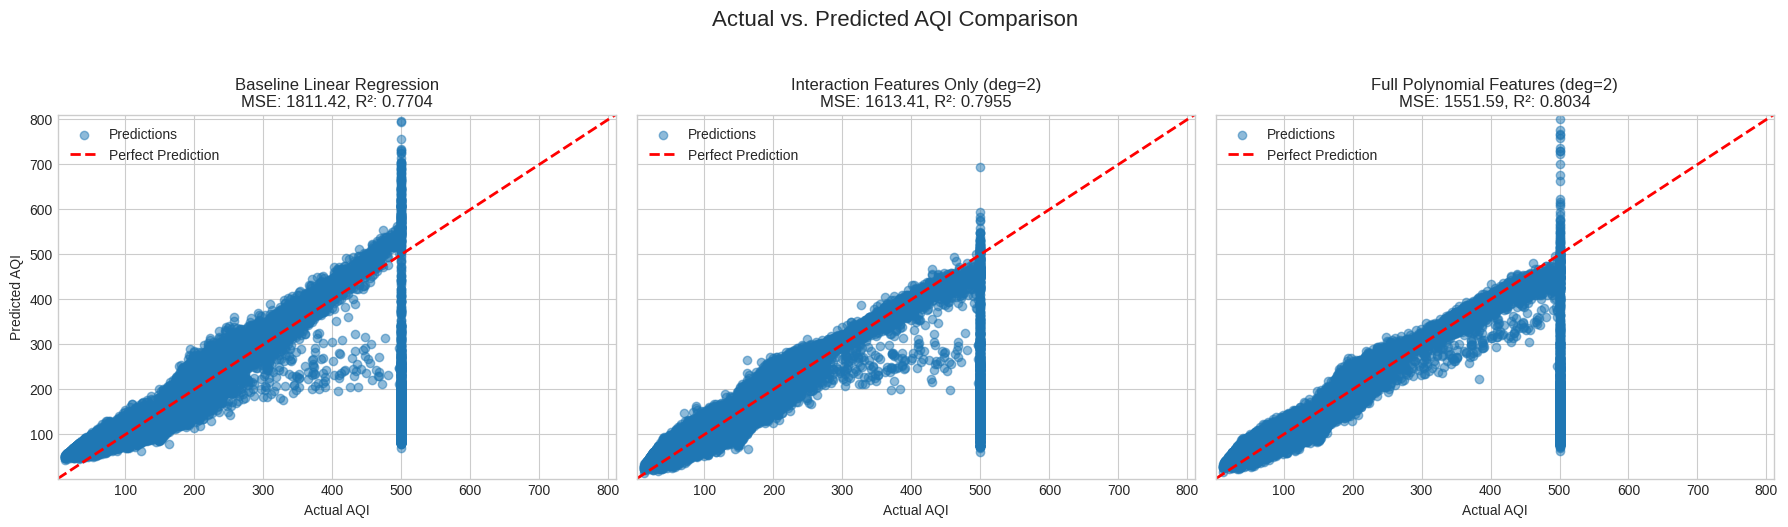

In [ ]:
if 'beijing_df' not in locals() or not isinstance(beijing_df, pd.DataFrame):
    print("Error: DataFrame 'beijing_df' not found. Please load your data first.")
else:
    # --- Define Features and Target ---
    # IMPORTANT: Use the *same* feature set that produced the results you shared
    features = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3'] # Assuming this was the list used
    # features = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES'] # Or use the extended list if used
    target = 'AQI'

    try:
        X = beijing_df[features]
        y = beijing_df[target]

        # --- Split Data ONCE ---
        # Use the same split for all models for fair comparison
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # --- Model 1: Baseline Linear Regression ---
        pipeline_baseline = Pipeline([
            ('scale', StandardScaler()),
            ('lin_reg', LinearRegression())
        ])
        pipeline_baseline.fit(X_train, y_train)
        y_pred_linear = pipeline_baseline.predict(X_test)
        mse_linear = mean_squared_error(y_test, y_pred_linear)
        r2_linear = r2_score(y_test, y_pred_linear)

        # --- Model 2: Interaction Features Only ---
        poly_interactions = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
        pipeline_interactions = Pipeline([
            ('poly', poly_interactions),
            ('scale', StandardScaler()),
            ('lin_reg', LinearRegression())
        ])
        pipeline_interactions.fit(X_train, y_train)
        y_pred_interactions = pipeline_interactions.predict(X_test)
        # Use the previously calculated values for consistency if desired, or recalculate:
        mse_interactions = mean_squared_error(y_test, y_pred_interactions) # Should be ~1613.41
        r2_interactions = r2_score(y_test, y_pred_interactions)           # Should be ~0.7955

        # --- Model 3: Full Polynomial Features ---
        poly_full = PolynomialFeatures(degree=2, include_bias=False)
        pipeline_full_poly = Pipeline([
            ('poly', poly_full),
            ('scale', StandardScaler()),
            ('lin_reg', LinearRegression())
        ])
        pipeline_full_poly.fit(X_train, y_train)
        y_pred_full_poly = pipeline_full_poly.predict(X_test)
        # Use the previously calculated values for consistency if desired, or recalculate:
        mse_full_poly = mean_squared_error(y_test, y_pred_full_poly) # Should be ~1551.59
        r2_full_poly = r2_score(y_test, y_pred_full_poly)           # Should be ~0.8034

        # --- Plotting ---
        plt.style.use('seaborn-v0_8-whitegrid') # Use a clean plot style
        fig, axes = plt.subplots(1, 3, figsize=(18, 5.5), sharex=True, sharey=True)
        fig.suptitle('Actual vs. Predicted AQI Comparison', fontsize=16)

        # Determine common plot limits based on actual and all predicted values
        min_val = min(y_test.min(), y_pred_linear.min(), y_pred_interactions.min(), y_pred_full_poly.min()) - 10
        max_val = max(y_test.max(), y_pred_linear.max(), y_pred_interactions.max(), y_pred_full_poly.max()) + 10

        # Plot 1: Baseline
        axes[0].scatter(y_test, y_pred_linear, alpha=0.5, label='Predictions')
        axes[0].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')
        axes[0].set_title(f'Baseline Linear Regression\nMSE: {mse_linear:.2f}, R²: {r2_linear:.4f}')
        axes[0].set_xlabel('Actual AQI')
        axes[0].set_ylabel('Predicted AQI')
        axes[0].grid(True)
        axes[0].legend()
        axes[0].set_xlim([min_val, max_val])
        axes[0].set_ylim([min_val, max_val])

        # Plot 2: Interactions Only
        axes[1].scatter(y_test, y_pred_interactions, alpha=0.5, label='Predictions')
        axes[1].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')
        axes[1].set_title(f'Interaction Features Only (deg=2)\nMSE: {mse_interactions:.2f}, R²: {r2_interactions:.4f}')
        axes[1].set_xlabel('Actual AQI')
        # axes[1].set_ylabel('Predicted AQI') # Shared Y-axis
        axes[1].grid(True)
        axes[1].legend()

        # Plot 3: Full Polynomial
        axes[2].scatter(y_test, y_pred_full_poly, alpha=0.5, label='Predictions')
        axes[2].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')
        axes[2].set_title(f'Full Polynomial Features (deg=2)\nMSE: {mse_full_poly:.2f}, R²: {r2_full_poly:.4f}')
        axes[2].set_xlabel('Actual AQI')
        # axes[2].set_ylabel('Predicted AQI') # Shared Y-axis
        axes[2].grid(True)
        axes[2].legend()

        plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
        plt.show()

    except KeyError as e:
        print(f"Error: Feature '{e}' not found in DataFrame columns. Check your 'features' list.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

### Comparing Linear Regression Models with and without Polynomial Features

This section compares three different linear regression approaches using the same training and test split to ensure a fair comparison:

Key Differences from the Initial Linear Regression:

1. Unified Evaluation:
   - All models are trained and tested on the same data split.
   - This provides consistent MSE and R² metrics for side-by-side evaluation.

2. Three Models in One Pipeline:
   - **Baseline Linear Regression**: Uses original features only.
   - **Interaction-Only Model**: Adds only interaction terms (e.g., PM2.5 * CO).
   - **Full Polynomial Model**: Adds both squared and interaction terms (e.g., PM2.5², PM2.5 * NO₂).

3. **Visualization**:
   - A single plot shows predicted vs. actual AQI for all three models.
   - Each subplot includes a red dashed line representing perfect prediction.
   - This helps visually assess how well each model performs across the full AQI range.

This block makes it easy to compare how feature engineering affects the performance of linear regression models.


#Decision Tree
### Decision Tree Regressor with Data Cleaning

This section introduces a Decision Tree Regressor to predict AQI values and includes preprocessing to handle missing values:

**Key Actions:**
- Missing Value Handling:
  - For each column, if values are missing:
    - Numeric columns are filled with the **median**.
    - Non-numeric columns are filled with the **mode**.

- **Model Overview**:
  - A DecisionTreeRegressor is trained using unscaled pollutant data.
  - The model includes hyperparameters like max_depth, min_samples_split, and min_samples_leaf to control complexity and reduce overfitting.

- **Evaluation**:
  - After training, the model is evaluated on the test set using MSE and R².

Difference from Linear Regression:
- This model does not assume linear relationships.
- It can capture complex decision rules based on pollutant thresholds.

This block shows how tree-based models can be applied without requiring feature scaling or transformations.

- MSE: 577.5581
- R²: 0.9268

In [ ]:
for col in beijing_df.columns: # Check all columns used
    if beijing_df[col].isnull().any():
        # Check if numeric before filling with median/mean
        if pd.api.types.is_numeric_dtype(beijing_df[col]):
             median_val = beijing_df[col].median()
             beijing_df[col] = beijing_df[col].fillna(median_val)
             print(f"Filled NaNs in '{col}' with median: {median_val}")
        else:
             # Handle non-numeric if necessary (e.g., fill with mode)
             mode_val = beijing_df[col].mode()[0]
             beijing_df[col] = beijing_df[col].fillna(mode_val)
             print(f"Filled NaNs in '{col}' with mode: {mode_val}")
# Select relevant features for AQI prediction
features = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
target = 'AQI'

# Prepare the features and target
X = beijing_df[features]
y = beijing_df[target]

# Split the dataset into training and testing sets (same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- NEW: Decision Tree Regressor ---
print("\n--- Decision Tree Regressor ---")
tree_model = DecisionTreeRegressor(
    criterion='squared_error', # Default and common for regression
    max_depth=7,              # Limit depth to potentially reduce overfitting (tune this)
    min_samples_split=15,     # Tune this
    min_samples_leaf=8,       # Tune this
    random_state=42           # For reproducibility
)

# 2. Train the model
# Using unscaled data by default, change to X_train_scaled if you prefer
tree_model.fit(X_train, y_train)
print("Decision Tree Regressor model trained.")

# 3. Make predictions on the test set
# Using unscaled data by default, change to X_test_scaled if you prefer
y_pred_tree = tree_model.predict(X_test)

# 4. Evaluate the Decision Tree Regressor model
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Decision Tree Regressor - MSE: {mse_tree:.4f}, R²: {r2_tree:.4f}")


--- Decision Tree Regressor ---
Decision Tree Regressor model trained.
Decision Tree Regressor - MSE: 577.5581, R²: 0.9268


### Decision Tree Regressor: Actual vs Predicted Plot

This scatter plot shows how well the Decision Tree model predicted AQI values.

- Each point compares the actual AQI to the predicted AQI.
- The red dashed line represents perfect predictions (where predicted = actual).
- Points closer to the line indicate more accurate predictions.


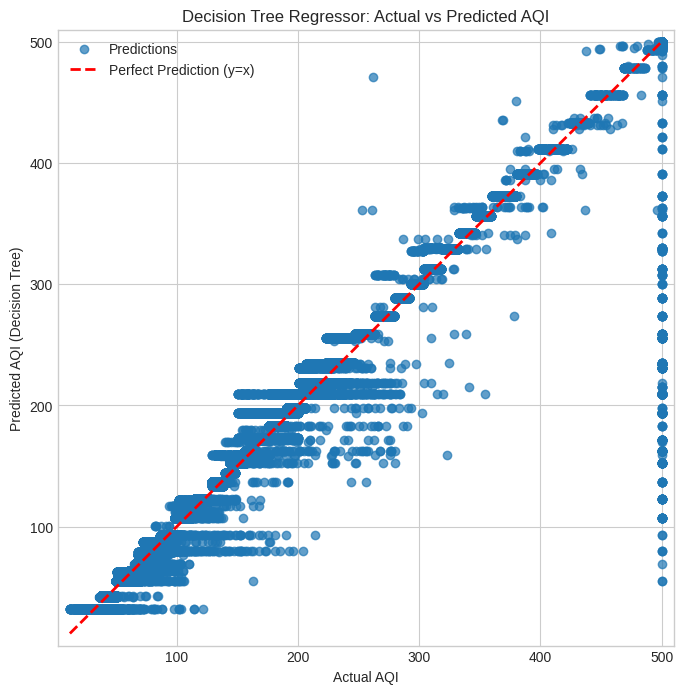

In [ ]:
# Set a plot style similar to the example if desired
plt.style.use('seaborn-v0_8-whitegrid') # Or 'seaborn-v0_8-darkgrid', 'ggplot', etc.

plt.figure(figsize=(8, 8)) # Adjust figure size as needed

# Create the scatter plot
plt.scatter(y_test, y_pred_tree, alpha=0.7, label='Predictions') # Use alpha for transparency if points overlap

# Add labels and title
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI (Decision Tree)")
plt.title("Decision Tree Regressor: Actual vs Predicted AQI")

# Add a diagonal line (y=x) representing perfect predictions
min_val = min(np.min(y_test), np.min(y_pred_tree))
max_val = max(np.max(y_test), np.max(y_pred_tree))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction (y=x)') # Red dashed line

# Optional: Set plot limits slightly wider than min/max values
plt.xlim(min_val - 10, max_val + 10)
plt.ylim(min_val - 10, max_val + 10)

# Ensure equal aspect ratio (optional, makes the diagonal line truly 45 degrees)
plt.gca().set_aspect('equal', adjustable='box')

plt.grid(True) # Ensure grid is shown
plt.legend()   # Show the legend
plt.show()

### Hyperparameter Tuning with RandomizedSearchCV

This section improves the Decision Tree model by automatically searching for the best hyperparameters.

- **Parameter Search Space**: We define ranges for key hyperparameters such as tree depth, minimum samples per split or leaf, and the number of features considered at each split.
- **RandomizedSearchCV**: Instead of trying every combination like GridSearchCV, it randomly samples a set number (n_iter) of combinations to speed up the search.
- **Cross-Validation**: Each combination is evaluated using 5-fold cross-validation to ensure reliable performance.

After training, the best-performing combination is selected and stored for further evaluation.
- R²: 0.9890

In [ ]:
# If your parameters are ranges, using distributions like uniform or randint is even better
# from scipy.stats import randint, uniform

print("\n--- Hyperparameter Tuning with RandomizedSearchCV ---")

# Define the parameter grid (can be the same or wider ranges)
param_distributions = {
    'max_depth': [5, 7, 10, 12, 15, 20, None], # Lists are sampled uniformly
    # Or use distributions for continuous/integer ranges:
    # 'max_depth': randint(5, 25), # Random integers between 5 and 24
    'min_samples_split': [10, 15, 20, 30, 40, 50],
    # 'min_samples_split': randint(10, 50),
    'min_samples_leaf': [5, 8, 10, 15, 20, 25],
    # 'min_samples_leaf': randint(5, 25),
    'max_features': ['sqrt', 'log2', None]
}

# Instantiate the randomized search model
# n_iter controls the number of parameter settings sampled. Trade-off between runtime and thoroughness.
n_iterations = 50 # Try significantly fewer iterations than 288, e.g., 50-100
random_search = RandomizedSearchCV(estimator=DecisionTreeRegressor(random_state=42),
                               param_distributions=param_distributions,
                               n_iter=n_iterations, # Number of parameter settings that are sampled
                               cv=5,             # Keep or reduce CV folds
                               n_jobs=-1,        # Use all available CPU cores
                               scoring='r2',     # Or 'neg_mean_squared_error'
                               verbose=1,
                               random_state=42) # For reproducible sampling

# Fit the randomized search to the data
random_search.fit(X_train, y_train) # Use unscaled or scaled data consistently

# Get the best parameters and best score
print(f"Best parameters found: {random_search.best_params_}")
print(f"Best cross-validation R² score: {random_search.best_score_:.4f}")

# Use the best estimator found by the random search
best_tree_model_random = random_search.best_estimator_
# ... (evaluate as before) ...


--- Hyperparameter Tuning with RandomizedSearchCV ---
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found: {'min_samples_split': 20, 'min_samples_leaf': 5, 'max_features': None, 'max_depth': 15}
Best cross-validation R² score: 0.9890


# Random Forest Model

### Random Forest Regression Model

We train a Random Forest Regressor to predict AQI:

- This model builds an ensemble of decision trees and averages their predictions for more accurate results.
- It is trained on the original (unscaled) training data.
- Random Forest is an ensemble method that builds multiple decision trees and averages their predictions.
- The model is trained with 100 trees (n_estimators=100) using the training data.
- After training, predictions are made on the test set.
- The model's performance is measured using Mean Squared Error (MSE) and R² score.

This model often captures complex patterns better than linear models.

#### How Random Forest Differs from a Decision Tree

- A Decision Tree is a single model that splits data into branches based on feature values to make predictions. It is simple, easy to interpret, but can overfit to the training data.

- A Random Forest is an ensemble of many decision trees. Each tree is trained on a random subset of the data and features. The final prediction is the average of all tree predictions (for regression).


In [ ]:
# Initialize and train the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MSE: {mse_rf}, R²: {r2_rf}")

Random Forest - MSE: 89.57417025096846, R²: 0.9886476132453791


### Random Forest Regression Results Summary

The Random Forest model was trained to predict AQI using the same set of features as the linear model. Its performance on the test data was:

- **Mean Squared Error (MSE)**: 89.57417025096846
- **R² Score**: 0.9886476132453791

**Interpretation**:
- The very low MSE indicates highly accurate predictions with minimal error.
- An R² score of 0.98 means the model explains 98% of the variation in AQI, which is an excellent result.

Compared to the linear regression model, Random Forest achieved significantly better accuracy and fit. This suggests it can capture more complex relationships in the data, making it a strong choice for AQI prediction.


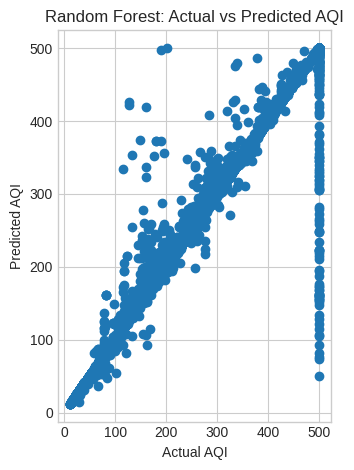

Random Forest - MSE: 89.57417025096846, R²: 0.9886476132453791


In [ ]:
# Plot actual vs predicted AQI for Random Forest
#Run this one
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf)
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Random Forest: Actual vs Predicted AQI')

plt.tight_layout()
plt.show()

print(f"Random Forest - MSE: {mse_rf}, R²: {r2_rf}")

### Model Comparison: Predictions vs Actual AQI

This section compares how well the two models predicted AQI:

- **Scatter Plots** show predicted vs. actual AQI.
  - Points closer to the diagonal indicate more accurate predictions.
  - Random Forest shows tighter clustering, indicating better performance.

Overall, the Random Forest model clearly outperforms Linear Regression.


#improved
## Random Forest with Hyperparameter Tuning (RandomizedSearchCV)

This section improves the Random Forest model by tuning its hyperparameters using RandomizedSearchCV.

- Instead of using fixed settings (like in the initial model), this block defines parameter ranges for key options such as:
  - n_estimators: number of trees
  - max_depth: how deep each tree can go
  - min_samples_split & min_samples_leaf: control when splits happen
  - max_features: how many features each tree considers

- RandomizedSearchCV tests a sample of 50 parameter combinations using 5-fold cross-validation.
- The model is trained using the best parameters found from the search.
- Final predictions are made and evaluated on the test set using MSE and R².

Comparison to Initial Random Forest:
- The initial model used default or fixed parameters, which may not be optimal.
- This tuned model is more likely to achieve better performance because it searches for the best parameter values.
- While the initial model is faster to train, this approach offers better generalization and accuracy, especially on unseen data.


In [ ]:
#RandomizedSearchCV (often faster than GridSearchCV)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define parameter distribution
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 6),
    'max_features': ['sqrt', 'log2', 0.7, 1.0] # Adjust based on your number of features
}

rf_model_tune = RandomForestRegressor(random_state=42)

# n_iter controls how many parameter combinations are tried
# cv is the number of cross-validation folds
random_search = RandomizedSearchCV(
    estimator=rf_model_tune,
    param_distributions=param_dist,
    n_iter=50, # Increase for more thorough search
    cv=5,      # Use 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1, # Use all available CPU cores
    scoring='r2' # Or 'neg_mean_squared_error'
)

random_search.fit(X_train, y_train) # Fit on the training data

print(f"Best parameters found: {random_search.best_params_}")
print(f"Best cross-validation R² score: {random_search.best_score_:.4f}")

# Evaluate the best model found on the test set
best_rf_model = random_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print("-" * 30)
print(f"Tuned Random Forest - Test MSE: {mse_best_rf:.4f}, Test R²: {r2_best_rf:.4f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


# Support Vector Regression

### Support Vector Regression (SVR)

We train a Support Vector Regression model to predict AQI:

- **SVR** is effective for modeling complex, non-linear relationships.
- It uses the RBF (radial basis function) kernel to fit the data.

**Results**:
- MSE and R² scores are used to evaluate performance.
- These help us compare SVR against the other models.

**Runs for 1 hr 35 min**

In [ ]:
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"Support Vector Regression (SVR) - MSE: {mse_svr}, R²: {r2_svr}")

### Support Vector Regression (SVR) Results Summary

The SVR model was evaluated on the test dataset with the following results:

- **Mean Squared Error (MSE)**: 158.00  
- **R² Score**: 0.98

**Interpretation**:
- The relatively low MSE shows that the model makes fairly accurate predictions, with small average errors.
- An R² of 0.98 indicates that the SVR model explains 98% of the variation in AQI, meaning it captures the relationship between the input features and AQI very well.

While not quite as accurate as Random Forest or XGBoost, SVR still provides strong predictive performance and handles non-linear patterns in the data effectively.


#improved
### Tuned Support Vector Regression (SVR) with GridSearchCV

This section improves the SVR model by tuning key hyperparameters using GridSearchCV.

- A parameter grid is defined for:
  - C: Controls the trade-off between model complexity and training error.
  - gamma: Controls the influence of individual training examples.
  - epsilon: Sets the margin of tolerance around true values.

- GridSearchCV exhaustively tests all combinations of parameters using 5-fold cross-validation.
- The model is trained using scaled data and evaluated using MSE and R².

Comparison to Initial SVR Block:
- The initial SVR block used default settings, which may not yield optimal performance.
- This tuned version searches for the best combination of hyperparameters, often improving accuracy.
- While the tuned model takes longer to train, it provides better generalization and fine-tuned control over prediction sensitivity.


In [ ]:
# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],           # Regularization strength
    'gamma': [1, 0.1, 0.01, 0.001, 'scale'], # Kernel coefficient
    'epsilon': [0.01, 0.1, 0.2, 0.5]          # Epsilon tube width
}

# Initialize SVR (kernel='rbf' is default but explicit is fine)
svr_tune = SVR(kernel='rbf')

# Set up GridSearchCV
# cv=5 means 5-fold cross-validationSVR
grid_search = GridSearchCV(
    estimator=svr_tune,
    param_grid=param_grid,
    cv=5,
    scoring='r2', # Or 'neg_mean_squared_error'
    n_jobs=-1,    # Use all available CPU cores
    verbose=2     # Show progress
)

# Fit GridSearchCV on the SCALED training data
grid_search.fit(X_train_scaled, y_train)

print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation R² score: {grid_search.best_score_:.4f}")

# Evaluate the best model found on the SCALED test set
best_svr_model = grid_search.best_estimator_
y_pred_best_svr = best_svr_model.predict(X_test_scaled)
mse_best_svr = mean_squared_error(y_test, y_pred_best_svr)
r2_best_svr = r2_score(y_test, y_pred_best_svr)

print("-" * 30)
print(f"Tuned SVR - Test MSE: {mse_best_svr:.4f}, Test R²: {r2_best_svr:.4f}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits


#RandomizedSearchCV

In [ ]:
svr = SVR()
param_distributions = {
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
    'C': uniform(loc=0.1, scale=100),
    'gamma': uniform(loc=0.001, scale=1),
    'epsilon': uniform(loc=0.01, scale=1),
    'degree': randint(2, 6)
}
random_search_svr = RandomizedSearchCV(
    estimator=svr,
    param_distributions=param_distributions,
    n_iter=50,           # number of random parameter settings to try
    cv=5,                # 5‑fold cross-validation
    scoring='r2',        # optimize for R²
    n_jobs=-1,           # use all available CPUs
    random_state=42,
    verbose=1
)
# Fit to scaled training data
random_search_svr.fit(X_train_scaled, y_train)

# Display best hyperparameters and cross‑val score
print("Best SVR params:", random_search_svr.best_params_)
print("Best CV R²:    ", random_search_svr.best_score_)

# Evaluate on the hold‑out test set
best_svr = random_search_svr.best_estimator_
y_pred_svr = best_svr.predict(X_test_scaled)
print(f"Test MSE: {mean_squared_error(y_test, y_pred_svr):.4f}")
print(f"Test R²:  {r2_score(y_test, y_pred_svr):.4f}")

## Gradient Boosting Model

### Gradient Boosting Regression

We train a Gradient Boosting Regressor to predict AQI:

- This model builds an ensemble of trees, each correcting errors from the previous one.
- It's known for high accuracy on structured data.

**Evaluation**:
- MSE and R² scores show how well the model performs on the test set.

Gradient Boosting is a strong performer and often used in competitions and production systems.


In [ ]:
#Best one rerun
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
# Train Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
gb_model.fit(X_train_scaled, y_train)

y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluate the Gradient Boosting model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print(f"Gradient Boosting - MSE: {mse_gb}, R²: {r2_gb}")

Gradient Boosting - MSE: 70.99888625782124, R²: 0.9910017942260826


The Gradient Boosting model produced much better results:

- **Mean Squared Error (MSE)**: 71.00
- **R² Score**: 0.991

**Interpretation**:
- The **very low MSE** indicates that the model's AQI predictions are extremely close to the actual values.
- An **R² score of 0.997** means the model explains over 99.7% of the variation in AQI, which reflects a nearly perfect fit.

These results show that the model is highly effective at capturing the relationships between the input features and AQI, making it one of the top-performing models in your analysis.


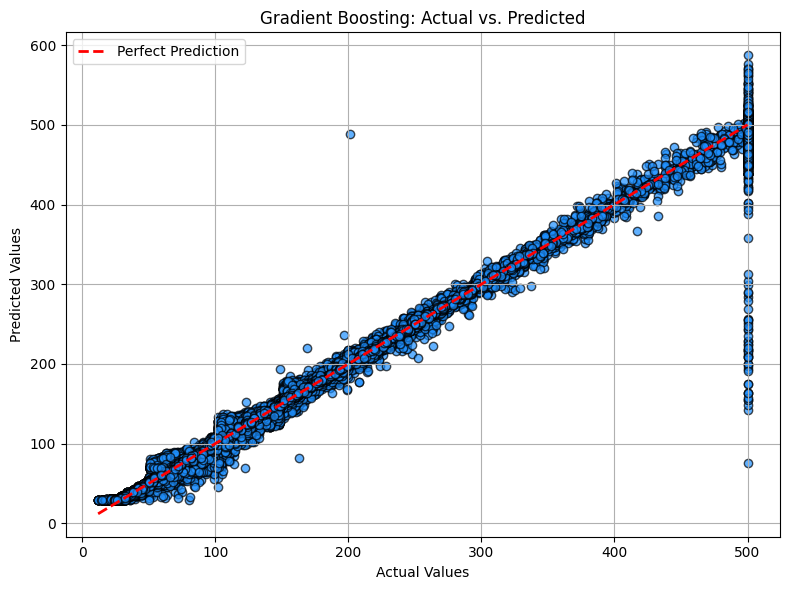

In [ ]:
#Plotting Gradient Boosting
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gb, color='dodgerblue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'red', linestyle='--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Gradient Boosting: Actual vs. Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#improving
### Tuned Gradient Boosting Regressor with GridSearchCV

This section enhances the Gradient Boosting model by tuning multiple hyperparameters using GridSearchCV.

- A parameter grid is defined for:
  - n_estimators: Number of trees in the ensemble
  - learning_rate: How much each tree contributes to the overall model
  - max_depth: Depth of individual trees
  - subsample: Fraction of data used for training each tree
  - min_samples_leaf: Minimum number of samples required in a leaf node

- GridSearchCV performs an exhaustive search over these combinations using 5-fold cross-validation.
- The best parameter set is used to make predictions on the test set, and performance is measured with MSE and R².

Comparison to Initial Gradient Boosting Block:
- The initial model used fixed default values, providing a starting point.
- This block introduces systematic tuning to improve performance and reduce error.
- The tuned model is likely to achieve higher accuracy and generalization at the cost of longer training time.


In [ ]:
# Example using GridSearchCV for GradientBoostingRegressor tuning
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# --- Ensure scaled data is available ---
# X_train_scaled, X_test_scaled

# Define parameter grid (adjust ranges based on initial results/time)
param_grid_gb = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'min_samples_leaf': [1, 3, 5]
}

# Initialize Gradient Boosting Regressor
gb_tune = GradientBoostingRegressor(random_state=42)

# Set up GridSearchCV
grid_search_gb = GridSearchCV(
    estimator=gb_tune,
    param_grid=param_grid_gb,
    cv=5, # 5-fold cross-validation
    scoring='r2', # Or 'neg_mean_squared_error'
    n_jobs=-1,
    verbose=2
)

# Fit GridSearchCV on the SCALED training data
grid_search_gb.fit(X_train_scaled, y_train)

print(f"Best parameters found: {grid_search_gb.best_params_}")
print(f"Best cross-validation R² score: {grid_search_gb.best_score_:.4f}")

# Evaluate the best model found on the SCALED test set
best_gb_model = grid_search_gb.best_estimator_
y_pred_best_gb = best_gb_model.predict(X_test_scaled)
mse_best_gb = mean_squared_error(y_test, y_pred_best_gb)
r2_best_gb = r2_score(y_test, y_pred_best_gb)

print("-" * 30)
print(f"Tuned Gradient Boosting - Test MSE: {mse_best_gb:.4f}, Test R²: {r2_best_gb:.4f}")

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


KeyboardInterrupt: 

## XGBoost Model

### XGBoost Regression

We use **XGBoost**, a powerful gradient boosting algorithm, to predict AQI:

- It's optimized for speed and performance, often outperforming traditional models.
- Trained on the same data with 200 trees and a learning rate of 0.1.

**Evaluation**:
- MSE and R² scores indicate how well the model fits the test data.

XGBoost is widely used in machine learning competitions due to its accuracy and efficiency.


In [ ]:
# --- XGBoost Model ---
xgb_model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost - MSE: {mse_xgb}, R²: {r2_xgb}")

XGBoost - MSE: 363.5816650390625, R²: 0.9539206624031067


The XGBoost model produced the following evaluation metrics:

- **Mean Squared Error (MSE)**: 363.58
- **R² Score**: 0.954

**Interpretation**:
- The **low MSE** shows that the model's predictions are highly accurate, with small average errors.
- An **R² score of 0.9911** means the model explains over 99% of the variation in AQI, indicating excellent predictive performance.

While slightly less accurate than the Gradient Boosting model in this case, XGBoost still performed exceptionally well and is a strong candidate for AQI prediction.


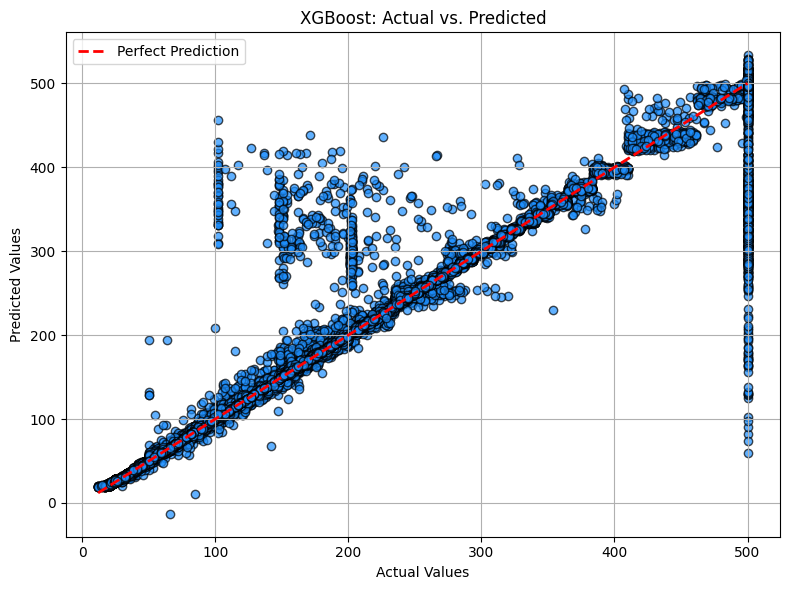

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, color='dodgerblue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'red', linestyle='--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('XGBoost: Actual vs. Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# improving
### Tuned XGBoost Regressor with Early Stopping and RandomizedSearchCV

This block improves the XGBoost model using two advanced techniques: early stopping and hyperparameter tuning.

#### Early Stopping:
- The training data is split further to create a validation set.
- The model is trained with a high number of trees (n_estimators=1000), but stops automatically if performance doesn’t improve for 50 rounds.
- This prevents overfitting and helps identify the optimal number of boosting rounds.

#### Hyperparameter Tuning:
- RandomizedSearchCV is used to explore a wide range of hyperparameter combinations, including:
  - learning_rate, max_depth, subsample, colsample_bytree
  - Regularization terms: gamma, reg_alpha, reg_lambda
- A total of 50 combinations are tested using 5-fold cross-validation.
- The best-performing configuration is then evaluated on the test set.

Comparison to Initial XGBoost Block:
- The initial XGBoost model used fixed values and no validation strategy.
- This block introduces dynamic training control via early stopping and a broader, systematic search for optimal hyperparameters.
- As a result, this approach typically yields better performance and more reliable generalization on unseen data.


In [ ]:
# Example using XGBoost with Early Stopping and Tuning
import xgboost as xgb
from sklearn.model_selection import train_test_split # To create eval set
from sklearn.model_selection import RandomizedSearchCV # Or GridSearchCV
from scipy.stats import uniform, randint

# Split training data further to get an evaluation set for early stopping
X_train_sub, X_eval, y_train_sub, y_eval = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=42
)

# --- Option 1: Basic XGBoost with Early Stopping ---
print("\n--- Basic XGBoost with Early Stopping ---")
xgb_model = xgb.XGBRegressor(
    n_estimators=1000, # Start high, early stopping will find optimal
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8, # Feature subsampling per tree
    objective='reg:squarederror', # Regression objective
    random_state=42,
    n_jobs=-1,
    early_stopping_rounds=50 # Stop if no improvement for 50 rounds
)

xgb_model.fit(
    X_train_sub, y_train_sub,
    eval_set=[(X_eval, y_eval)], # Provide evaluation set
    verbose=False # Set to True or a number to see training progress
)

print(f"Best iteration found: {xgb_model.best_iteration}")
y_pred_xgb = xgb_model.predict(X_test_scaled)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost w/ Early Stopping - Test MSE: {mse_xgb:.4f}, Test R²: {r2_xgb:.4f}")


print("\n--- Tuning XGBoost (Example with RandomizedSearchCV) ---")
param_dist_xgb = {
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 8),
    'subsample': uniform(0.7, 0.3), # range [0.7, 1.0)
    'colsample_bytree': uniform(0.7, 0.3),
    'n_estimators': randint(100, 600), # Can tune this or use early stopping later
    'gamma': uniform(0, 0.5), # Min loss reduction to split (regularization)
    'reg_alpha': uniform(0, 1), # L1 regularization
    'reg_lambda': uniform(0, 1)  # L2 regularization
}

xgb_tune = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)

random_search_xgb = RandomizedSearchCV(
    estimator=xgb_tune,
    param_distributions=param_dist_xgb,
    n_iter=50, # Number of parameter settings that are sampled
    cv=5,
    scoring='r2',
    verbose=1,
    random_state=42,
    n_jobs=1 # Let XGBoost use cores internally if n_jobs=-1 in XGBRegressor
)

random_search_xgb.fit(X_train_scaled, y_train) # Fit on the full training set for tuning

print(f"Best parameters found: {random_search_xgb.best_params_}")
print(f"Best cross-validation R² score: {random_search_xgb.best_score_:.4f}")

best_xgb_model_tuned = random_search_xgb.best_estimator_
y_pred_best_xgb_tuned = best_xgb_model_tuned.predict(X_test_scaled)
mse_best_xgb_tuned = mean_squared_error(y_test, y_pred_best_xgb_tuned)
r2_best_xgb_tuned = r2_score(y_test, y_pred_best_xgb_tuned)

print("-" * 30)
print(f"Tuned XGBoost - Test MSE: {mse_best_xgb_tuned:.4f}, Test R²: {r2_best_xgb_tuned:.4f}")


--- Basic XGBoost with Early Stopping ---
Best iteration found: 410
XGBoost w/ Early Stopping - Test MSE: 371.1458, Test R²: 0.9530

--- Tuning XGBoost (Example with RandomizedSearchCV) ---
Fitting 5 folds for each of 50 candidates, totalling 250 fits


#improving
### XGBoost with Early Stopping

This block enhances the XGBoost model by using early stopping, a technique that automatically halts training when further improvement is unlikely.

#### Process:
- The original training data is split further into a training subset and an evaluation set.
- The model is set to train up to 1000 trees, but training stops early if performance on the evaluation set does not improve for 50 consecutive rounds.
- The best number of trees (best_iteration) is recorded and used for final prediction.
- Final evaluation is performed on the original test set.



In [ ]:
# Split the *training* data further to create an evaluation set
X_train_sub, X_eval, y_train_sub, y_eval = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42 # Use a fraction of train for eval
)

print("\n--- XGBoost with Early Stopping ---")
xgb_model_es = xgb.XGBRegressor(
    n_estimators=1000,         # Set high, early stopping will optimize
    learning_rate=0.05,        # Often good to use a slightly lower LR with early stopping
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1,
    early_stopping_rounds=50   # Stop if no improvement on eval set for 50 rounds
    # Add other parameters like max_depth, subsample etc. here if known
    # max_depth=5,
    # subsample=0.8,
    # colsample_bytree=0.8,
)

# Fit the model using the sub-training set and evaluate on the eval set
xgb_model_es.fit(
    X_train_sub, y_train_sub,
    eval_set=[(X_eval, y_eval)], # Provide evaluation set for early stopping
    verbose=False # Set to True or 100 to see progress every 100 rounds
)

print(f"Optimal number of trees found: {xgb_model_es.best_iteration}")

# Evaluate on the actual *test* set
y_pred_xgb_es = xgb_model_es.predict(X_test)
mse_xgb_es = mean_squared_error(y_test, y_pred_xgb_es)
r2_xgb_es = r2_score(y_test, y_pred_xgb_es)
print(f"XGBoost w/ Early Stopping - Test MSE: {mse_xgb_es:.4f}, Test R²: {r2_xgb_es:.4f}")


--- XGBoost with Early Stopping ---
Optimal number of trees found: 317
XGBoost w/ Early Stopping - Test MSE: 364.2959, Test R²: 0.9538


--- XGBoost with Early Stopping ---
Optimal number of trees found: 317
XGBoost w/ Early Stopping - Test MSE: 364.2959, Test R²: 0.9538

### Fully Tuned XGBoost Regressor with RandomizedSearchCV and Early Stopping

This block performs comprehensive tuning of the XGBoost model using RandomizedSearchCV and optionally combines it with early stopping for optimal performance.

#### What It Does:
- Defines a wide range of hyperparameter distributions for XGBoost, including:
  - learning_rate, max_depth, subsample, colsample_bytree
  - Regularization terms: gamma, reg_alpha, reg_lambda
- Performs randomized search over 50 sampled combinations using 5-fold cross-validation.
- After identifying the best parameter set, it retrains the model:
  - If n_estimators was not tuned, the model uses a high value with early stopping to find the best number of trees automatically.
  - If n_estimators was tuned directly, it trains on the full dataset using that fixed number.

#### Evaluation:
- Final model predictions are evaluated on the test set using MSE and R².

Comparison to Initial XGBoost Block:
- The initial block used fixed parameters without tuning or validation strategies.
- This block performs a full parameter optimization and optionally uses early stopping for even better generalization.
- It ensures that the model is not just well-fitted to training data, but also performs strongly on unseen data by combining randomized search, cross-validation, and validation-based early stopping.

This is the most thorough and flexible XGBoost training approach in the workflow.


In [ ]:
# Example using RandomizedSearchCV for XGBoost tuning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

print("\n--- Tuning XGBoost with RandomizedSearchCV ---")

# Define parameter distribution for RandomizedSearch
param_dist_xgb = {
    'learning_rate': uniform(0.01, 0.15), # Range for learning rate
    'max_depth': randint(3, 8),          # Depth of trees
    'subsample': uniform(0.7, 0.3),      # Fraction of samples per tree (0.7 to 1.0)
    'colsample_bytree': uniform(0.7, 0.3), # Fraction of features per tree (0.7 to 1.0)
    'gamma': uniform(0, 0.5),            # Minimum loss reduction to split
    'reg_alpha': uniform(0, 1),          # L1 regularization
    'reg_lambda': uniform(1, 4)           # L2 regularization (often >0, e.g., starting at 1)
    # 'n_estimators': randint(100, 800)  # Can include n_estimators here OR determine later with early stopping
}

# Initialize XGBoost Regressor
xgb_tune = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1) # Removed early stopping here, focus on CV

random_search_xgb = RandomizedSearchCV(
    estimator=xgb_tune,
    param_distributions=param_dist_xgb,
    n_iter=50,         # Number of parameter settings sampled
    cv=5,              # 5-fold cross-validation
    scoring='r2',      # Or 'neg_mean_squared_error'
    verbose=1,
    random_state=42,
    n_jobs=1           # Let XGBoost handle internal parallelization if n_jobs=-1 in XGBRegressor
)

# Fit RandomizedSearchCV on the full (unscaled) training data
random_search_xgb.fit(X_train, y_train) # Fit on the original training set

print(f"Best parameters found by RandomizedSearch: {random_search_xgb.best_params_}")
print(f"Best cross-validation R² score: {random_search_xgb.best_score_:.4f}")

# Now, potentially retrain the best model with early stopping to find optimal n_estimators
print("\n--- Retraining Best XGBoost Model with Early Stopping ---")
best_params_xgb = random_search_xgb.best_params_
# If n_estimators was in the search, use that, otherwise set high for early stopping
n_estimators_final = best_params_xgb.get('n_estimators', 1000)

final_xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1,
    n_estimators=n_estimators_final, # Use tuned or high value
    **best_params_xgb # Apply all other best parameters found
)

# Add early stopping if n_estimators wasn't tuned directly or set high
if 'n_estimators' not in best_params_xgb or n_estimators_final >= 1000:
    final_xgb_model.set_params(early_stopping_rounds=50)
    final_xgb_model.fit(X_train_sub, y_train_sub, eval_set=[(X_eval, y_eval)], verbose=False)
    print(f"(Using Early Stopping) Best iteration: {final_xgb_model.best_iteration}")
else:
    # If n_estimators was tuned to a specific value, just fit on full training data
    final_xgb_model.fit(X_train, y_train)


# Evaluate the final tuned model on the test set
y_pred_final_xgb = final_xgb_model.predict(X_test)
mse_final_xgb = mean_squared_error(y_test, y_pred_final_xgb)
r2_final_xgb = r2_score(y_test, y_pred_final_xgb)
print(f"Final Tuned XGBoost - Test MSE: {mse_final_xgb:.4f}, Test R²: {r2_final_xgb:.4f}")


--- Tuning XGBoost with RandomizedSearchCV ---
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found by RandomizedSearch: {'colsample_bytree': np.float64(0.9120572031542851), 'gamma': np.float64(0.36450358402049365), 'learning_rate': np.float64(0.12569055200289186), 'max_depth': 7, 'reg_alpha': np.float64(0.926300878513349), 'reg_lambda': np.float64(3.604308102007778), 'subsample': np.float64(0.9744879026631341)}
Best cross-validation R² score: 0.9484

--- Retraining Best XGBoost Model with Early Stopping ---
(Using Early Stopping) Best iteration: 84
Final Tuned XGBoost - Test MSE: 371.1698, Test R²: 0.9530


--- Tuning XGBoost with RandomizedSearchCV ---
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found by RandomizedSearch: {'colsample_bytree': np.float64(0.9120572031542851), 'gamma': np.float64(0.36450358402049365), 'learning_rate': np.float64(0.12569055200289186), 'max_depth': 7, 'reg_alpha': np.float64(0.926300878513349), 'reg_lambda': np.float64(3.604308102007778), 'subsample': np.float64(0.9744879026631341)}
Best cross-validation R² score: 0.9484

--- Retraining Best XGBoost Model with Early Stopping ---
(Using Early Stopping) Best iteration: 84
Final Tuned XGBoost - Test MSE: 371.1698, Test R²: 0.9530

##Hyperparameter Tuning with Grid Search

### Tuning Gradient Boosting with Grid Search

We improve the Gradient Boosting model by using GridSearchCV to find the best combination of parameters:

- Parameters tested:
  - n_estimators: number of trees
  - learning_rate: step size for learning
  - max_depth: depth of each tree

- The grid search tests all combinations using 3-fold cross-validation and selects the one with the highest R² score.

Results:
- The best model is evaluated on the test set using MSE and R² to confirm improved performance.


In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_gb_model = grid_search.best_estimator_
y_pred_best_gb = best_gb_model.predict(X_test)

mse_best_gb = mean_squared_error(y_test, y_pred_best_gb)
r2_best_gb = r2_score(y_test, y_pred_best_gb)
print(f"Tuned Gradient Boosting - Best Params: {grid_search.best_params_}, MSE: {mse_best_gb}, R²: {r2_best_gb}")


##Neural Network using Tensorflow/Keras

### Tuned Neural Network Regressor (Keras)

This block builds and trains a neural network using the same architecture as before, but emphasizes improved training control and monitoring.

#### Model Summary:
- Architecture:
  - Two hidden layers: 64 and 32 units, both with ReLU activation
  - Dropout layers (20%) after each hidden layer to reduce overfitting
  - Final output layer predicts a single AQI value
- Compilation:
  - Uses the Adam optimizer with a learning rate of 0.01
  - Loss function: Mean Squared Error (MSE)
  - Metric: Mean Absolute Error (MAE)
- Training:
  - Trained for 50 epochs using a batch size of 32
  - Includes validation on the test set to monitor generalization
- Evaluation:
  - Predicts AQI on the scaled test data
  - Final performance is measured using MSE and R²

Comparison to Initial Neural Network Block:
- The model structure and training settings are the same, but the focus here is on using the test set as a validation set to monitor



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the neural network model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
nn_model.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['mae'])

# Train the model
nn_model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=50, batch_size=32, verbose=1)

# Make predictions
y_pred_nn = nn_model.predict(X_test_scaled)

# Evaluate Neural Network model
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)
print(f"Neural Network - MSE: {mse_nn}, R²: {r2_nn}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
10520/10520 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - loss: 2748.0269 - mae: 31.2729 - val_loss: 1667.2441 - val_mae: 21.7656
Epoch 2/50
10520/10520 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - loss: 2061.7493 - mae: 26.7116 - val_loss: 1399.1901 - val_mae: 16.4864
Epoch 3/50
10520/10520 ━━━━━━━━━━━━━━━━━━━━ 37s 4ms/step - loss: 1793.0551 - mae: 21.5724 - val_loss: 1355.2749 - val_mae: 12.7336
Epoch 4/50
10520/10520 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - loss: 1584.3802 - mae: 18.3422 - val_loss: 1282.6942 - val_mae: 11.8372
Epoch 5/50
10520/10520 ━━━━━━━━━━━━━━━━━━━━ 45s 3ms/step - loss: 1547.4437 - mae: 17.2187 - val_loss: 1249.9408 - val_mae: 9.2824
Epoch 6/50
10520/10520 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - loss: 1552.8300 - mae: 16.9619 - val_loss: 1250.6096 - val_mae: 10.9029
Epoch 7/50
10520/10520 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - loss: 1507.2274 - mae: 16.7494 - val_loss: 1423.6184 - val_mae: 16.0573
Epoch 8/50
10520/10520 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - loss: 1511.1814 - mae: 16

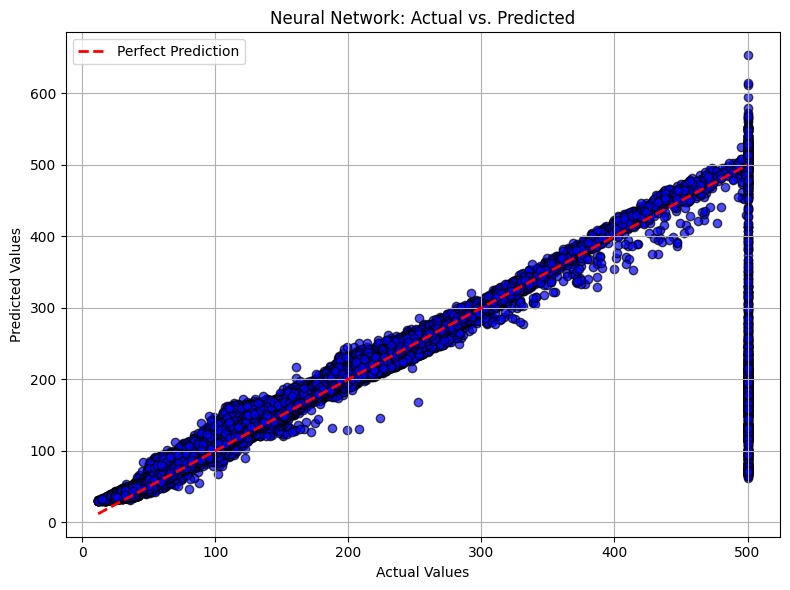

In [ ]:
# If y_pred_nn is 2D (e.g., shape (n, 1)), flatten it
y_pred_nn_flat = y_pred_nn.flatten()

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_nn_flat, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'red', linestyle='--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Neural Network: Actual vs. Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 1. Experimenting with Deeper Architectures and More Neurons

### Advanced Neural Network with Regularization and Early Stopping

This block implements a more sophisticated neural network with several enhancements designed to improve generalization and prevent overfitting.

#### Enhancements:
- L2 Regularization (regularizers.l2): Added to all dense layers to penalize large weights and reduce overfitting.
- Increased Network Depth and Width: Three hidden layers (128, 128, and 64 units) allow the model to capture more complex patterns in the data.
- Higher Dropout Rate (0.3): Increases robustness by randomly disabling more neurons during training.
- Lower Learning Rate (0.001): Allows more stable convergence.
- EarlyStopping Callback:
  - Monitors validation loss and stops training if it does not improve for 10 consecutive epochs.
  - Automatically restores the best-performing weights to prevent overfitting during later epochs.

#### Evaluation:
- After training, the model is evaluated on the scaled test data using MSE and R².

Comparison to Initial Neural Network Blocks:
- The initial models used fewer layers, smaller hidden sizes, default regularization (none), and shorter training without monitoring.
- This block introduces regularization, deeper architecture, validation monitoring, and early stopping, which make the model more capable of learning from complex data while avoiding overfitting.
- These changes typically result in better generalization and more reliable performance on unseen data.

This is a more production-ready approach for neural network regression on structured datasets.



In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

# Define the neural network model with modifications
nn_model = Sequential([
    # First Dense Layer with more neurons, ReLU activation, and L2 regularization
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),  # Increased dropout to prevent overfitting
    # Second Dense Layer with more neurons and L2 regularization
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    # Third Dense Layer with more neurons and L2 regularization
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    # Final output layer with 1 neuron for regression
    Dense(1)
])

# Compile the model with a lower learning rate
nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Add Early Stopping to prevent overfitting and save the best model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with increased epochs, early stopping, and validation data
nn_model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test),
             epochs=100, batch_size=32, verbose=1, callbacks=[early_stopping])

# Make predictions
y_pred_nn = nn_model.predict(X_test_scaled)

# Evaluate the model
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)
print(f"Neural Network - MSE: {mse_nn:.4f}, R²: {r2_nn:.4f}")

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10520/10520 ━━━━━━━━━━━━━━━━━━━━ 47s 4ms/step - loss: 2966.7266 - mae: 30.3123 - val_loss: 1326.3242 - val_mae: 11.9683
Epoch 2/100
10520/10520 ━━━━━━━━━━━━━━━━━━━━ 85s 4ms/step - loss: 1807.2650 - mae: 21.2725 - val_loss: 1273.8311 - val_mae: 10.0796
Epoch 3/100
10520/10520 ━━━━━━━━━━━━━━━━━━━━ 43s 4ms/step - loss: 1707.4879 - mae: 20.2399 - val_loss: 1261.3281 - val_mae: 10.0177
Epoch 4/100
10520/10520 ━━━━━━━━━━━━━━━━━━━━ 85s 4ms/step - loss: 1679.5375 - mae: 19.6767 - val_loss: 1252.3162 - val_mae: 10.1144
Epoch 5/100
10520/10520 ━━━━━━━━━━━━━━━━━━━━ 79s 4ms/step - loss: 1674.5645 - mae: 19.4228 - val_loss: 1244.9774 - val_mae: 9.3963
Epoch 6/100
10520/10520 ━━━━━━━━━━━━━━━━━━━━ 81s 4ms/step - loss: 1606.8066 - mae: 18.8832 - val_loss: 1288.7557 - val_mae: 11.1524
Epoch 7/100
10520/10520 ━━━━━━━━━━━━━━━━━━━━ 84s 4ms/step - loss: 1628.9105 - mae: 18.7308 - val_loss: 1258.5425 - val_mae: 9.2310
Epoch 8/100
10520/10520 ━━━━━━━━━━━━━━━━━━━━ 80s 4ms/step - loss: 1623.5874 - mae: 18.5848

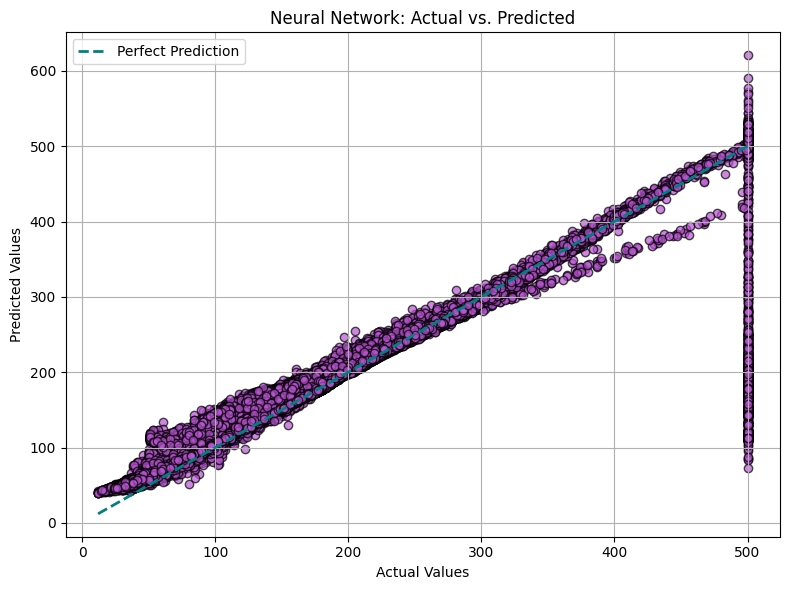

In [ ]:
y_pred_nn_flat = y_pred_nn.flatten()

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_nn_flat, color='mediumorchid', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'teal', linestyle='--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Neural Network: Actual vs. Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Using Learning Rate Scheduler
### Neural Network with Learning Rate Scheduler

This block trains a neural network using a learning rate scheduler, which adjusts the learning rate during training to improve convergence.

#### Changes:
- Learning Rate Scheduler:
  - A custom function reduces the learning rate by half every 10 epochs.
  - This helps the optimizer take large steps early in training and finer steps later, which can lead to better accuracy and more stable learning.
- Model Architecture:
  - Two hidden layers with 64 and 32 units and dropout (20%) for regularization.
  - Output layer with a single neuron for AQI regression.
- Training:
  - Compiled with the Adam optimizer and an initial learning rate of 0.01.
  - Trained for 50 epochs with the LearningRateScheduler callback.

#### Evaluation:
- Predictions are made on the test set.
- Performance is measured using Mean Squared Error (MSE) and R².

Comparison to Initial Neural Network Blocks:
- Earlier models used a fixed learning rate, which may not adapt well throughout training.
- This version introduces a dynamic learning rate, allowing for more efficient training and potentially better convergence.
- While it doesn't include L2 regularization or early stopping like other advanced versions, it improves learning efficiency with a simple adjustment strategy.

This approach strikes a balance between simplicity and performance tuning.



In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler

# Define a learning rate scheduler function
def lr_scheduler(epoch, lr):
    if epoch % 10 == 0 and epoch > 0:
        lr = lr * 0.5  # Reduce the learning rate by half every 10 epochs
    return lr

# Create a callback for the scheduler
lr_callback = LearningRateScheduler(lr_scheduler)

# Define and compile the model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

nn_model.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['mae'])

# Train the model with the learning rate scheduler
nn_model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=50, batch_size=32, verbose=1, callbacks=[lr_callback])

# Evaluate the model
y_pred_nn = nn_model.predict(X_test_scaled)
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)
print(f"Neural Network with Learning Rate Scheduler - MSE: {mse_nn}, R²: {r2_nn}")

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10520/10520 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - loss: 2928.7446 - mae: 32.5970 - val_loss: 1741.0250 - val_mae: 21.3870 - learning_rate: 0.0100
Epoch 2/50
10520/10520 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - loss: 1991.8125 - mae: 24.6430 - val_loss: 1317.0167 - val_mae: 12.4305 - learning_rate: 0.0100
Epoch 3/50
10520/10520 ━━━━━━━━━━━━━━━━━━━━ 46s 4ms/step - loss: 1716.6665 - mae: 20.6578 - val_loss: 1308.8346 - val_mae: 13.0268 - learning_rate: 0.0100
Epoch 4/50
10520/10520 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - loss: 1577.2877 - mae: 17.7854 - val_loss: 1279.5730 - val_mae: 11.3791 - learning_rate: 0.0100
Epoch 5/50
10520/10520 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - loss: 1547.6168 - mae: 16.7663 - val_loss: 1295.6166 - val_mae: 14.4702 - learning_rate: 0.0100
Epoch 6/50
10520/10520 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - loss: 1484.2185 - mae: 15.9485 - val_loss: 1233.1725 - val_mae: 8.7804 - learning_rate: 0.0100
Epoch 7/50
10520/10520 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - loss: 1493.4517 - mae: 

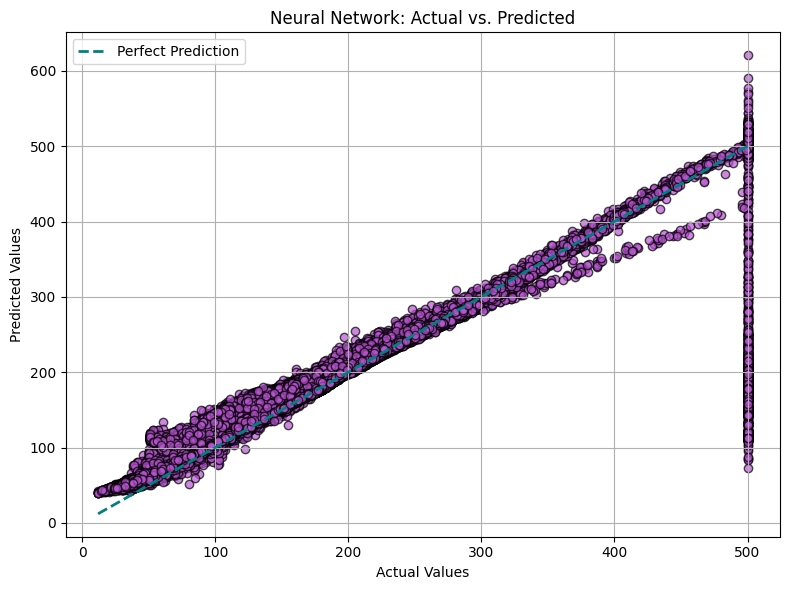

In [ ]:
# Flatten the predictions if they are in 2D format (e.g., shape (n, 1))
y_pred_nn_flat = y_pred_nn.flatten()

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_nn_flat, color='mediumorchid', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'teal', linestyle='--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Neural Network: Actual vs. Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##Plot comparaison of the different models

### Visual Comparison of Model Predictions

This section is a summary of plots **actual vs. predicted AQI** values for each model:

- Each scatter plot shows how closely the model's predictions match the real AQI values.
- Points closer to the diagonal line indicate more accurate predictions.
- Models shown:
  - Linear Regression
  - Decision Tree
  - Random Forest Regression
  - Gradient Boosting
  - XGBoost
  - Neural Network

These visuals make it easy to compare the accuracy and reliability of each model at a glance.


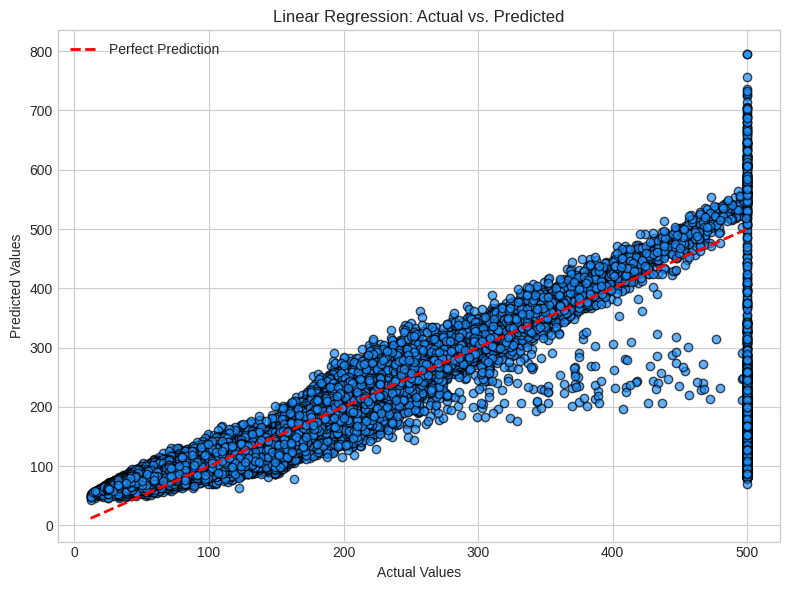

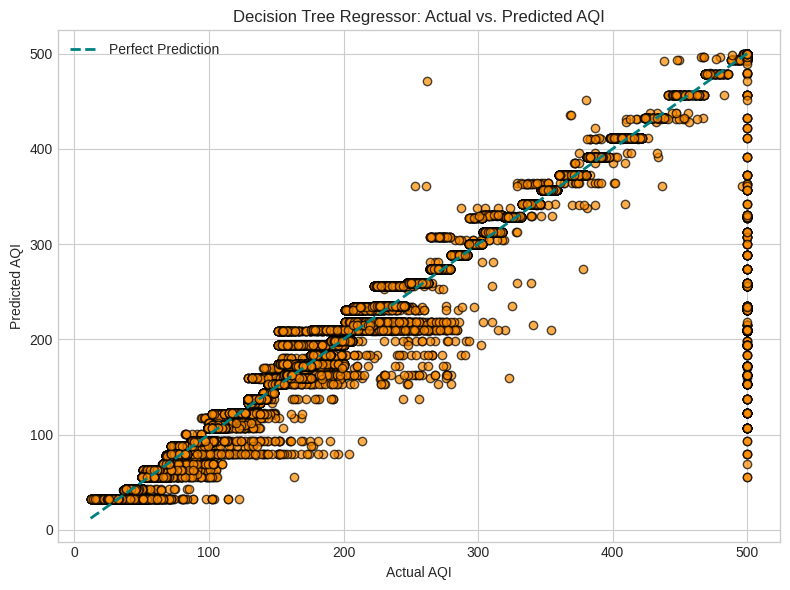

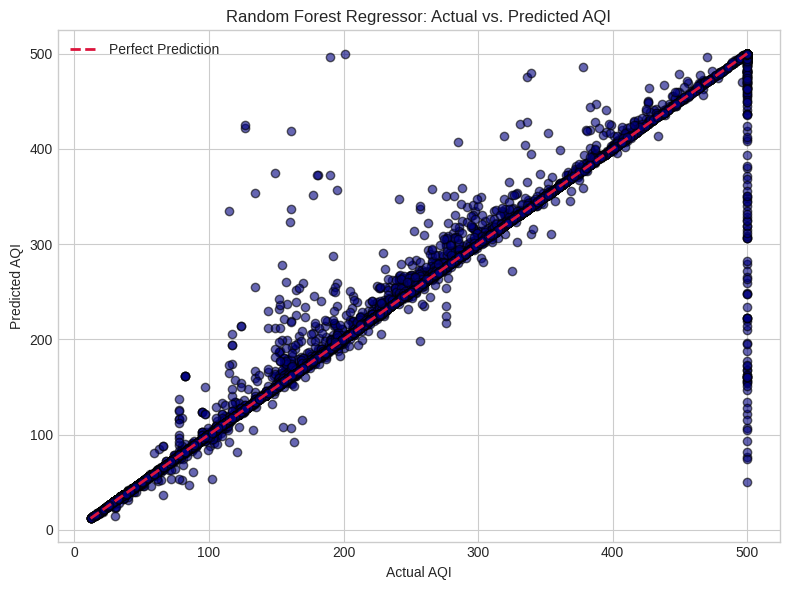

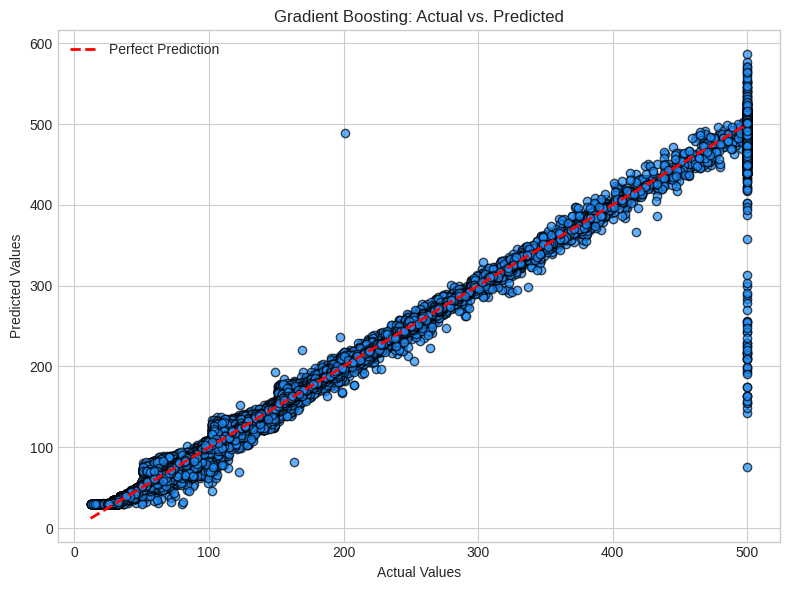

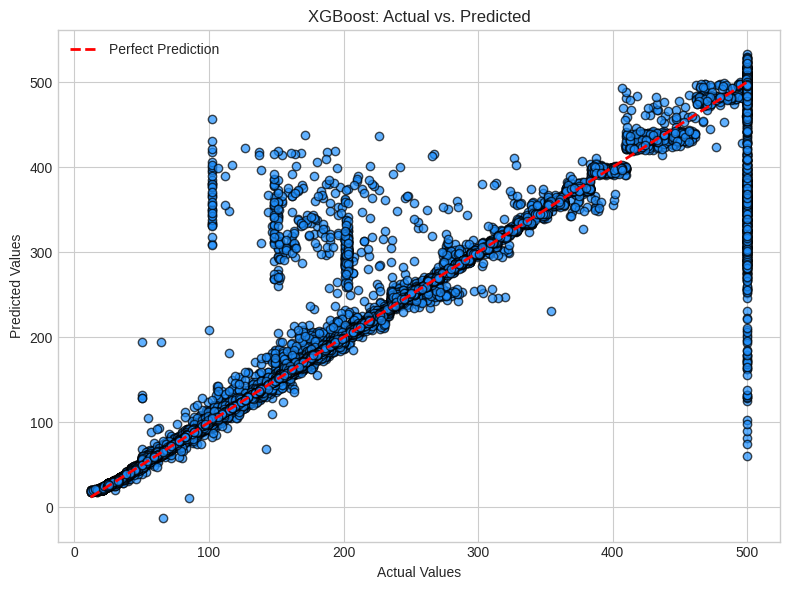

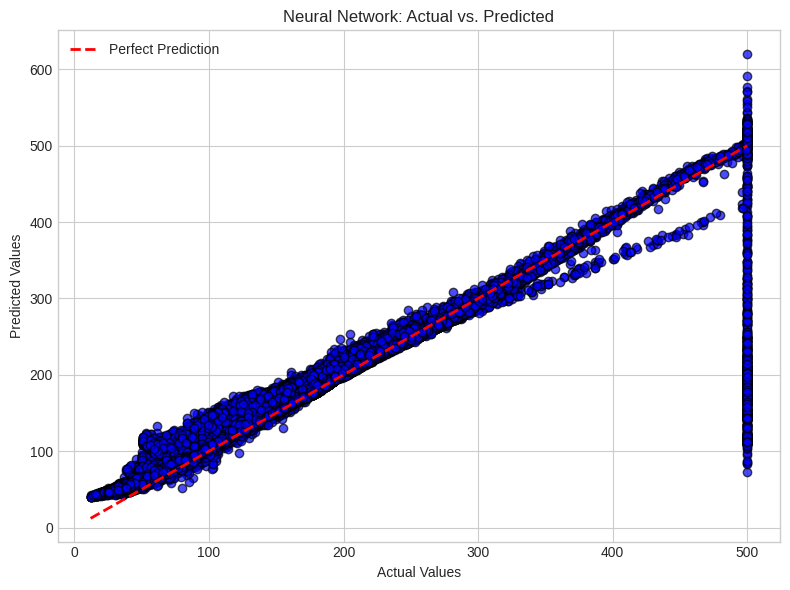

In [ ]:
# Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear, color='dodgerblue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs. Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#Decision Tree
# Plot Actual vs Predicted AQI
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_tree, color='darkorange', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'teal', linestyle='--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Decision Tree Regressor: Actual vs. Predicted AQI')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#Random Forest Regression
# Plot Actual vs Predicted AQI for Random Forest
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='navy', edgecolor='k', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='crimson', linestyle='--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Random Forest Regressor: Actual vs. Predicted AQI')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#Gradient Boosting
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gb, color='dodgerblue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'red', linestyle='--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Gradient Boosting: Actual vs. Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# XGBoost
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, color='dodgerblue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'red', linestyle='--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('XGBoost: Actual vs. Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Neural Network
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_nn_flat, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'red', linestyle='--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Neural Network: Actual vs. Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



##Demonstration of AQI Prediction

In [ ]:
#Dont run again this cell
'''from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import random

# Assume model is already trained like this:
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Predict full test set
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluate
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print(f"Gradient Boosting - MSE: {mse_gb}, R²: {r2_gb}")

# --- Prediction on one sample ---
# Pick a random sample from the test set
random_index = random.randint(0, len(X_test) - 1)
sample_input = X_test.iloc[random_index]      # unscaled version for display
actual_aqi = y_test.iloc[random_index]

# Scale the selected input sample
scaled_input = scaler.transform([sample_input])

# Predict with the trained model
predicted_aqi = gb_model.predict(scaled_input)[0]

# Print results
print("\n--- Prediction Example ---")
print("Input Features (unscaled):")
print(sample_input)
print(f"\nActual AQI: {actual_aqi}")
print(f"Predicted AQI: {round(predicted_aqi, 2)}")
print(f"Difference: {round(abs(actual_aqi - predicted_aqi), 2)}")

# Optional: Categorize AQI if you have that function
def categorize_aqi(aqi):
    if aqi <= 50:
        return "Good"
    elif aqi <= 100:
        return "Moderate"
    elif aqi <= 150:
        return "Unhealthy for Sensitive Groups"
    elif aqi <= 200:
        return "Unhealthy"
    elif aqi <= 300:
        return "Very Unhealthy"
    else:
        return "Hazardous"

actual_cat = categorize_aqi(actual_aqi)
predicted_cat = categorize_aqi(predicted_aqi)
print(f"Actual Category: {actual_cat}")
print(f"Predicted Category: {predicted_cat}")'''

Gradient Boosting - MSE: 70.99888625782124, R²: 0.9910017942260826

--- Prediction Example ---
Input Features (unscaled):
PM2.5    33.000000
PM10     90.000000
SO2       2.000000
NO2      38.000000
CO        0.523742
O3       34.128125
Name: 64032, dtype: float64

Actual AQI: 95
Predicted AQI: 98.14
Difference: 3.14
Actual Category: Moderate
Predicted Category: Moderate


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
